In [26]:
import pandas as pd
import numpy as np

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

In [28]:
transfer = pd.read_csv('/Users/cody/Documents/GitHub/Capstone/transfer_dataset.csv')

In [29]:
transfer.head()

,transfer,player,age,season,matches_played,play_proportion,raw_goals,raw_assists,raw_nonpenaltykick_goal,total_pass_attempts,...,tackle_ratio,Shot_Blocks,Pass_Blocks,Clearances,Aerial_Win_Percentage,aerials_total,FW,MF,DF,90minutes
0,1,Fabinho,24,2017-2018,34,1.000,0.206,0.088,0.088,58.912,...,0.561,0.382,1.029,1.824,0.676,4.088,0,1,0,34.000
1,1,Rachid Ghezzal,26,2017-2018,26,0.867,0.179,0.268,0.179,50.815,...,0.774,0.000,1.521,0.179,0.290,2.773,1,1,0,11.178
2,1,Nampalys Mendy,26,2017-2018,14,0.500,0.000,0.093,0.000,69.389,...,0.462,0.093,0.746,0.933,0.500,0.560,0,1,0,10.722
3,1,Max Gradel,30,2017-2018,29,1.000,0.298,0.037,0.149,37.863,...,0.571,0.075,1.379,1.118,0.206,2.348,1,1,0,26.833
4,1,Issa Diop,21,2017-2018,34,1.000,0.088,0.000,0.088,36.676,...,0.741,0.735,0.382,3.765,0.613,2.735,0,0,1,34.000


In [30]:
X = transfer.drop(columns = ['transfer', 'player', 'season'])
y = transfer['transfer']

## Linear Kernel

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=12)

In [95]:
model = SVC(kernel = 'linear', class_weight='balanced')
model.fit(X_train, y_train)

SVC(class_weight='balanced', kernel='linear')

In [96]:
y_pred = model.predict(X_test)

In [97]:
accuracy = accuracy_score(y_test,y_pred)

In [98]:
print(accuracy)

0.6122778675282714


In [99]:
conf_matrix = confusion_matrix(y_test, y_pred)

<function matplotlib.pyplot.show(close=None, block=None)>

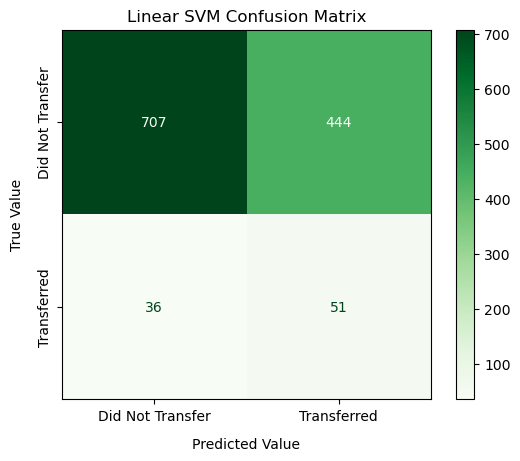

In [ ]:
binary_names = ['Did Not Transfer', 'Transferred']
conf = ConfusionMatrixDisplay(conf_matrix, display_labels= binary_names)
conf.plot(cmap = plt.cm.Greens)
plt.title("Linear SVM Confusion Matrix -- Balanced Weights")
plt.xlabel("Predicted Value", labelpad = 10)
plt.ylabel("True Value", labelpad = 10)
plt.yticks(rotation = 90, va='center')
plt.show

## Polynomial Kernel With Balanced Weights

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=28)

In [89]:
param_grid = {'degree': [2, 3, 4, 5], 'C': [0.1, 1, 10]}
svc = SVC(kernel='poly', class_weight='balanced')
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 10, 'degree': 3}


In [90]:
model = SVC(kernel = 'poly', degree=3, C=10, class_weight='balanced')
model.fit(X_train, y_train)

SVC(C=10, class_weight='balanced', kernel='poly')

In [91]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.7592891760904685


In [92]:
conf_matrix = confusion_matrix(y_test, y_pred)

<function matplotlib.pyplot.show(close=None, block=None)>

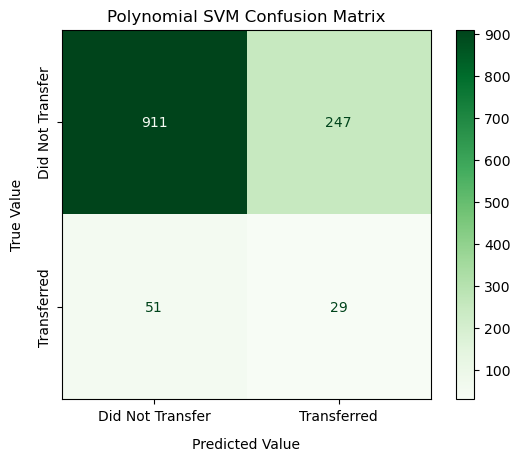

In [ ]:
binary_names = ['Did Not Transfer', 'Transferred']
conf = ConfusionMatrixDisplay(conf_matrix, display_labels= binary_names)
conf.plot(cmap = plt.cm.Greens)
plt.title("Polynomial SVM Confusion Matrix -- Balanced Weights")
plt.xlabel("Predicted Value", labelpad = 10)
plt.ylabel("True Value", labelpad = 10)
plt.yticks(rotation = 90, va='center')
plt.show

## Polynomial Kernel with Adjusted Weights

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=67)

In [130]:
model = SVC(kernel = 'poly', degree=3, C=10, class_weight={0:1, 1:14})
model.fit(X_train, y_train)

SVC(C=10, class_weight={0: 1, 1: 14}, kernel='poly')

<function matplotlib.pyplot.show(close=None, block=None)>

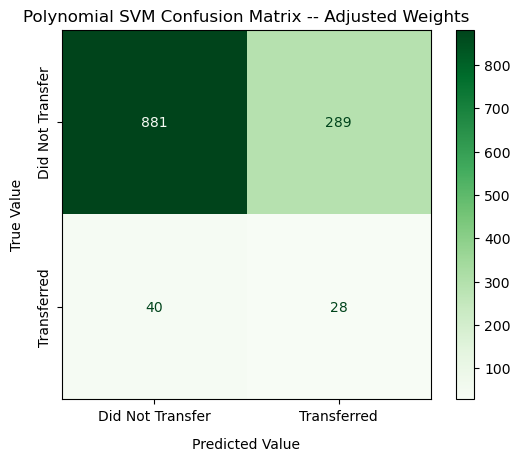

In [131]:
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
binary_names = ['Did Not Transfer', 'Transferred']
conf = ConfusionMatrixDisplay(conf_matrix, display_labels= binary_names)
conf.plot(cmap = plt.cm.Greens)
plt.title("Polynomial SVM Confusion Matrix -- Adjusted Weights")
plt.xlabel("Predicted Value", labelpad = 10)
plt.ylabel("True Value", labelpad = 10)
plt.yticks(rotation = 90, va='center')
plt.show